In [190]:
import pygame, time
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

In [191]:
OUTPUT_RATE= 44100
MAX_AMPLITUDE= np.iinfo(np.int16).max
pygame.mixer.init(frequency= OUTPUT_RATE, channels=2, size= -16)

In [192]:
def sine_wave(pitch, volume, duration):
    
    global OUTPUT_RATE, MAX_AMPLITUDE

    total_samples= int(OUTPUT_RATE*duration)
    output_buffer= np.zeros( (total_samples, 2), dtype= np.int16)

    amplitude= int(MAX_AMPLITUDE*volume)
    wave_step= float(pitch/OUTPUT_RATE)*2*np.pi

    for i in range(total_samples):
        output_buffer[i][0]= amplitude*np.sin(i*wave_step)
        output_buffer[i][1]= amplitude*np.sin(i*wave_step)

    return output_buffer

In [193]:
def square_wave(pitch, volume, duration):
    
    global OUTPUT_RATE, MAX_AMPLITUDE

    total_samples= int(OUTPUT_RATE*duration)
    t= np.linspace(0, duration, OUTPUT_RATE, endpoint=True)
    amplitude= int(MAX_AMPLITUDE*volume)
    
    output_buffer= np.zeros( (total_samples, 2), dtype= np.int16)
    signal_array= amplitude*signal.square(2*np.pi*pitch*t)
    
    for i in range(total_samples):
        output_buffer[i][0]= output_buffer[i][1]= signal_array[i]
        

    return output_buffer

In [194]:
def sawtooth_wave(pitch, volume, duration):
    
    global OUTPUT_RATE, MAX_AMPLITUDE

    total_samples= int(OUTPUT_RATE*duration)
    t= np.linspace(0, duration, OUTPUT_RATE, endpoint=True)
    amplitude= int(MAX_AMPLITUDE*volume)
    
    output_buffer= np.zeros( (total_samples, 2), dtype= np.int16)
    signal_array= amplitude*signal.sawtooth(2*np.pi*pitch*t)
    
    for i in range(total_samples):
        output_buffer[i][0]= output_buffer[i][1]= signal_array[i]
        

    return output_buffer

In [203]:
def chirp(pitch, volume, duration):
    
    global OUTPUT_RATE, MAX_AMPLITUDE

    total_samples= int(OUTPUT_RATE*duration)
    t= np.linspace(0, duration, OUTPUT_RATE, endpoint=True)
    amplitude= int(MAX_AMPLITUDE*volume)
    
    output_buffer= np.zeros( (total_samples, 2), dtype= np.int16)
    signal_array= amplitude*signal.chirp(t, f0=pitch, t1= total_samples, f1= 3*pitch)
    
    for i in range(total_samples):
        output_buffer[i][0]= output_buffer[i][1]= signal_array[i]
        

    return output_buffer

In [204]:
def triangle_wave(pitch, volume, duration):
    
    global OUTPUT_RATE, MAX_AMPLITUDE

    total_samples= int(OUTPUT_RATE*duration)
    t= np.linspace(0, duration, OUTPUT_RATE, endpoint=True)
    amplitude= int(MAX_AMPLITUDE*volume)
    
    output_buffer= np.zeros( (total_samples, 2), dtype= np.int16)
    signal_array= amplitude*signal.sawtooth(2*np.pi*pitch*t, 0.5)
    
    for i in range(total_samples):
        output_buffer[i][0]= output_buffer[i][1]= signal_array[i]
        

    return output_buffer

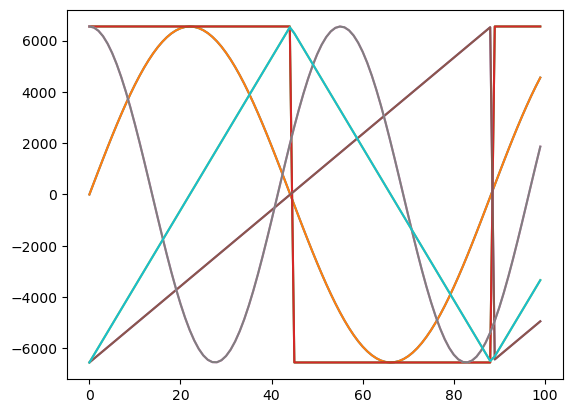

In [205]:
sine_wave500= sine_wave(500, 0.2, 1)
square_wave500= square_wave(500, 0.2, 1)
sawtooth_wave500= sawtooth_wave(500, 0.2, 1)
chirp_500= chirp(800, 0.2, 1)
triangle_500= triangle_wave(500, 0.2, 1)


plt.plot(sine_wave500[:100])
plt.plot(square_wave500[:100])
plt.plot(sawtooth_wave500[:100])
plt.plot(chirp_500[:100])
plt.plot(triangle_500[:100])

plt.show()

In [206]:
sine_note= pygame.mixer.Sound(buffer= sine_wave500)
square_note= pygame.mixer.Sound(buffer= square_wave500)
saw_note= pygame.mixer.Sound(buffer= sawtooth_wave500)
chirp_note= pygame.mixer.Sound(buffer= chirp_500)
triangle_note= pygame.mixer.Sound(buffer= triangle_500)

sine_note.play()
time.sleep(1)
chirp_note.play()
time.sleep(1)
square_note.play()
time.sleep(1)
saw_note.play()
time.sleep(1)
triangle_note.play()